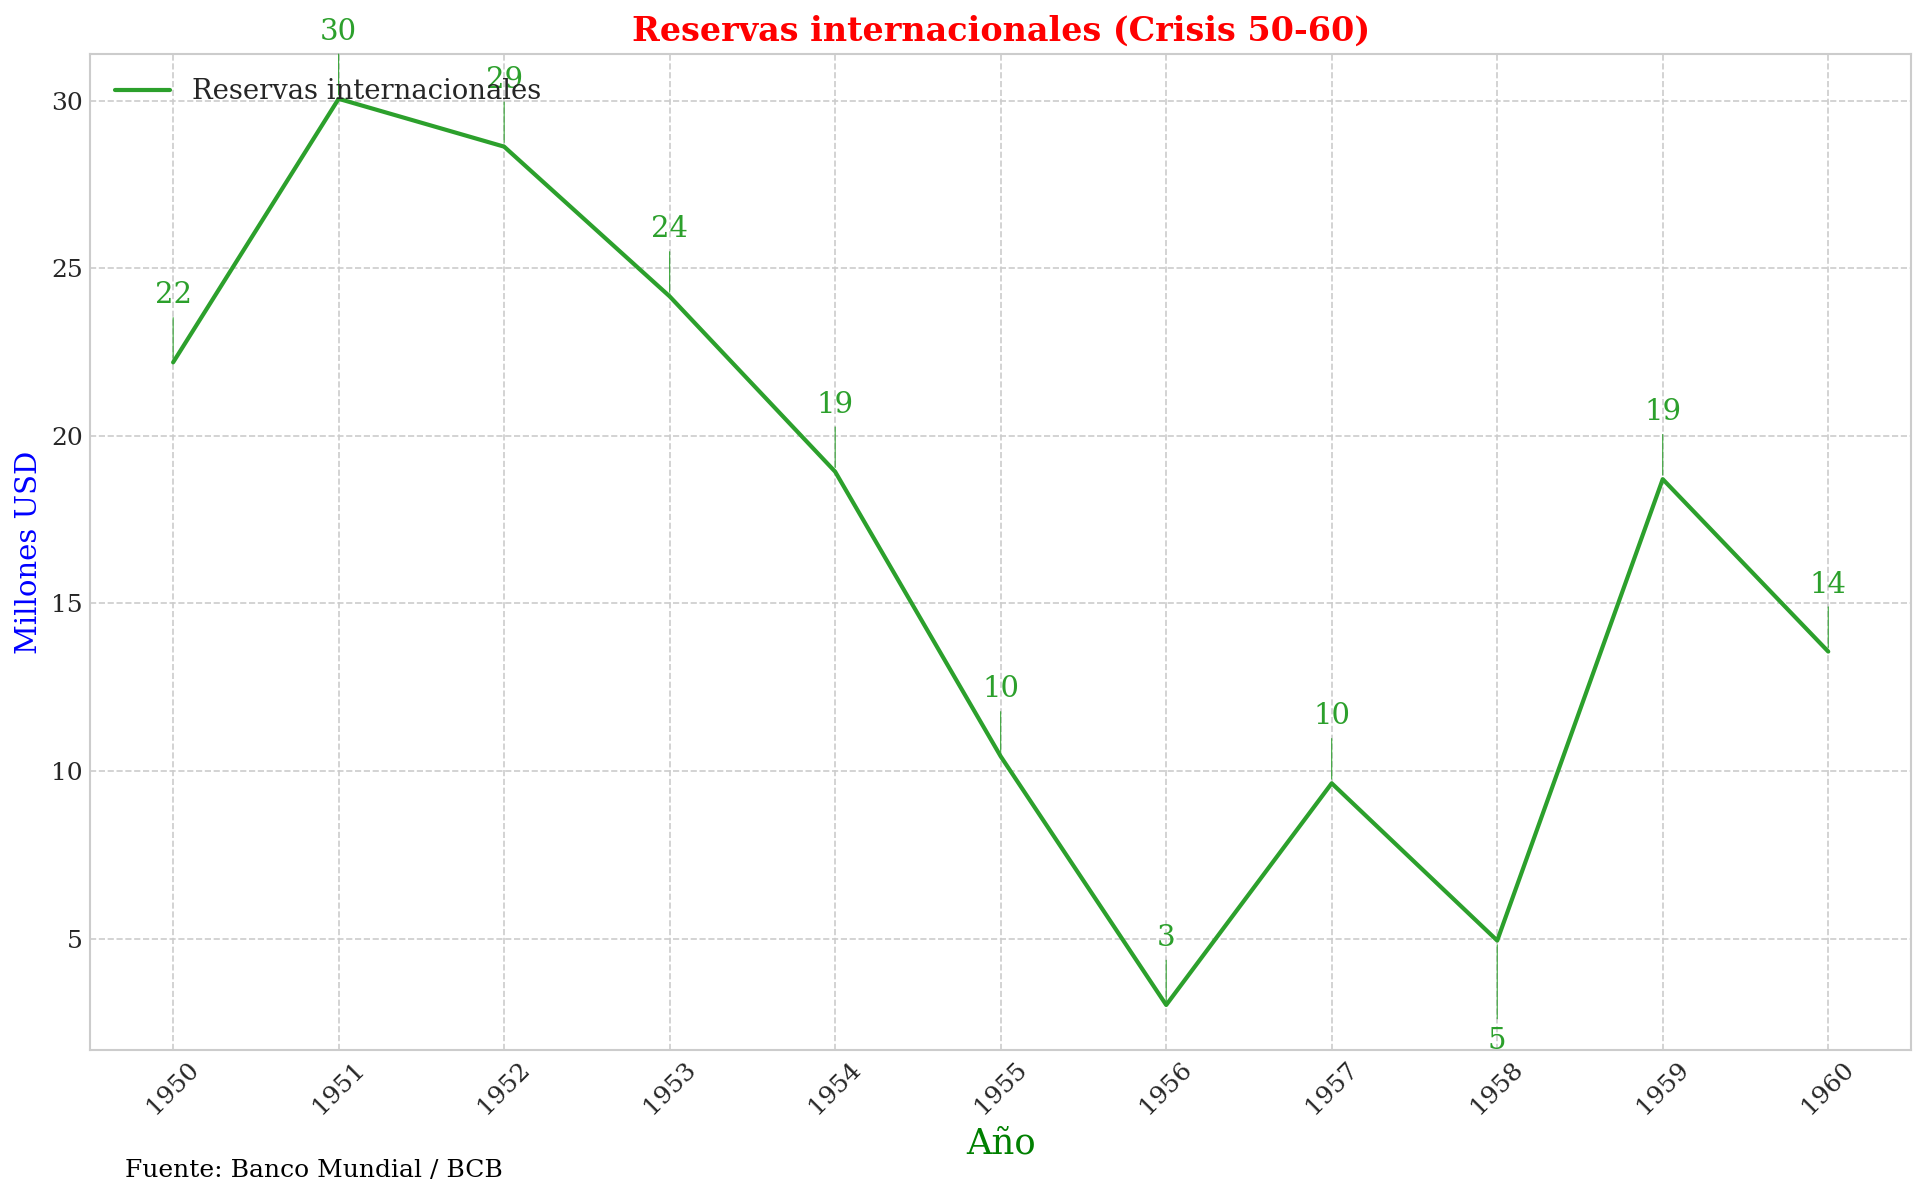

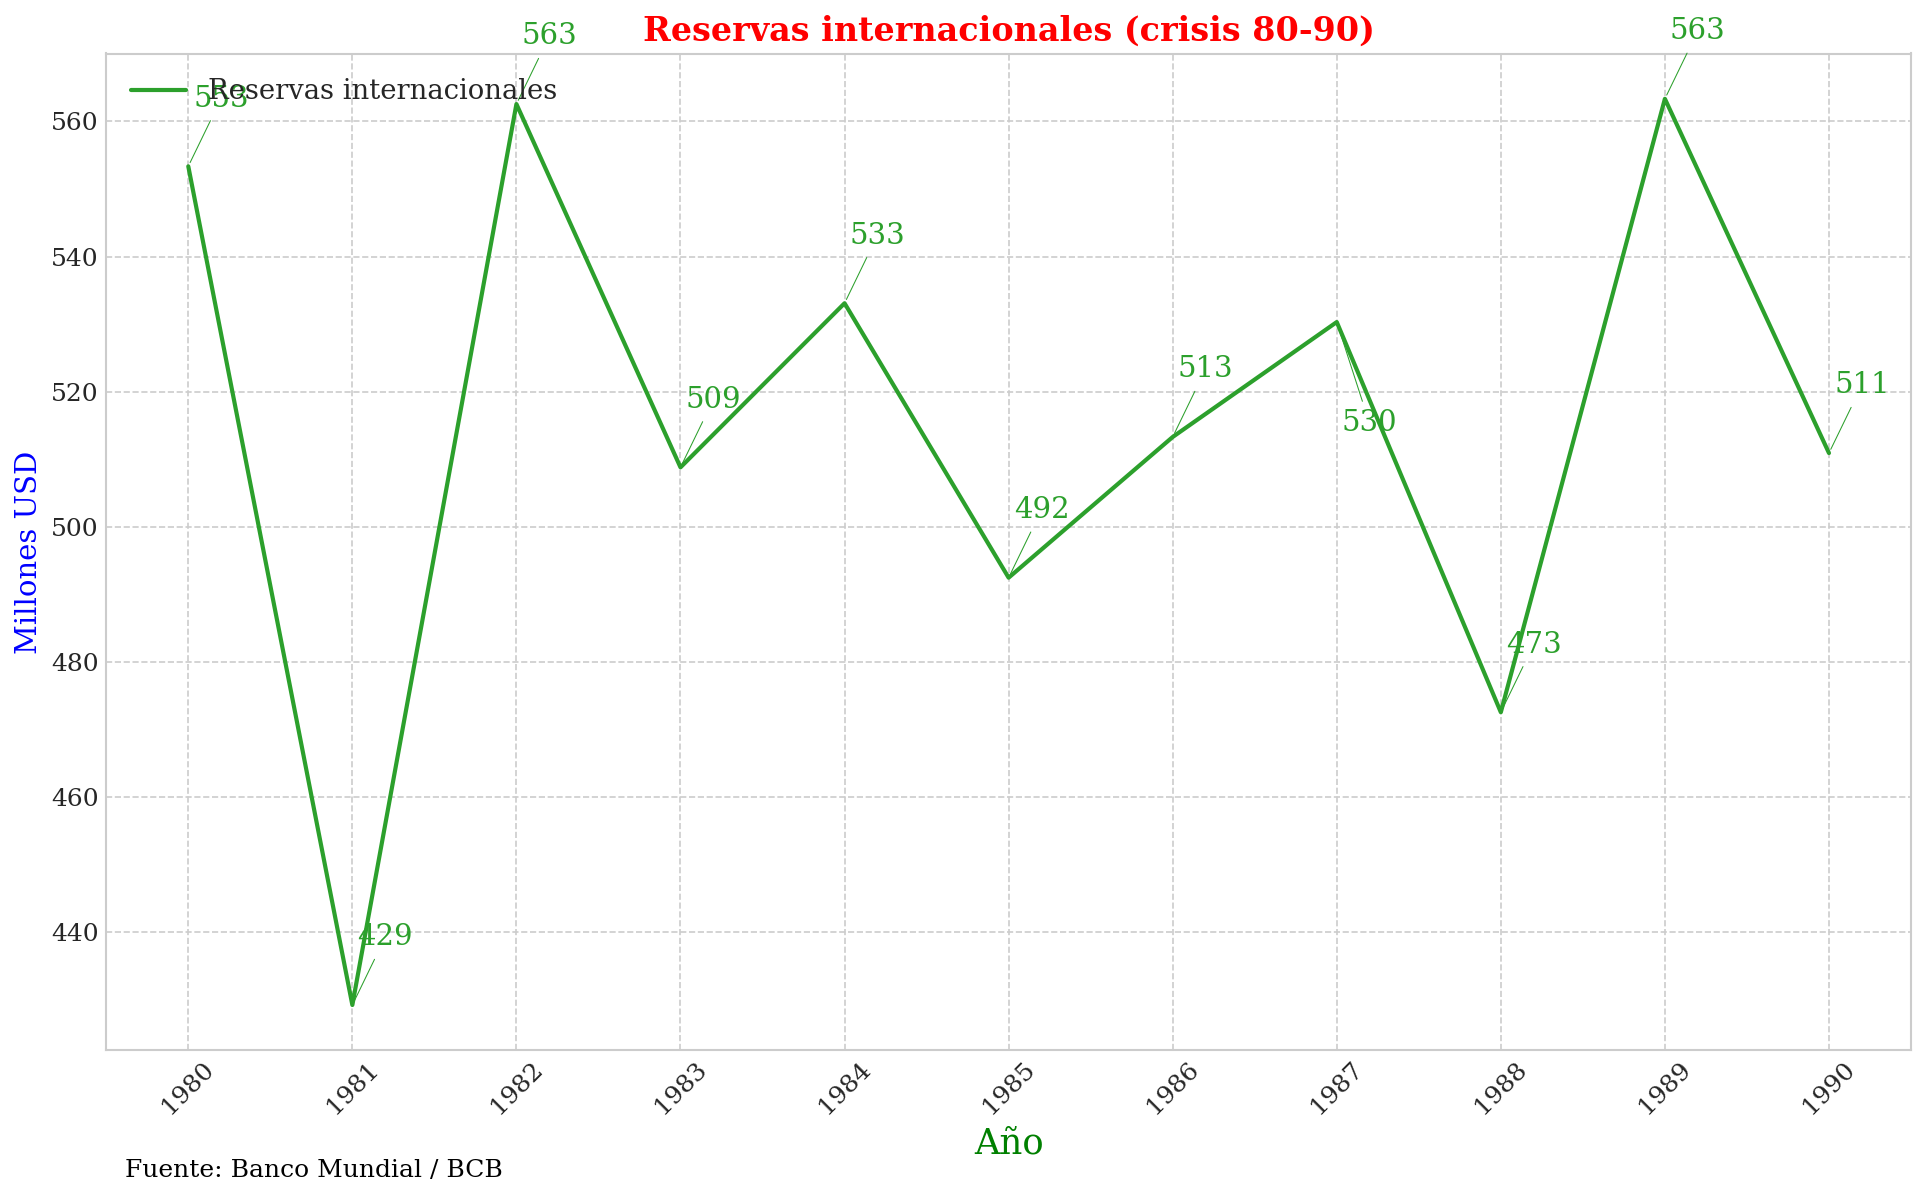

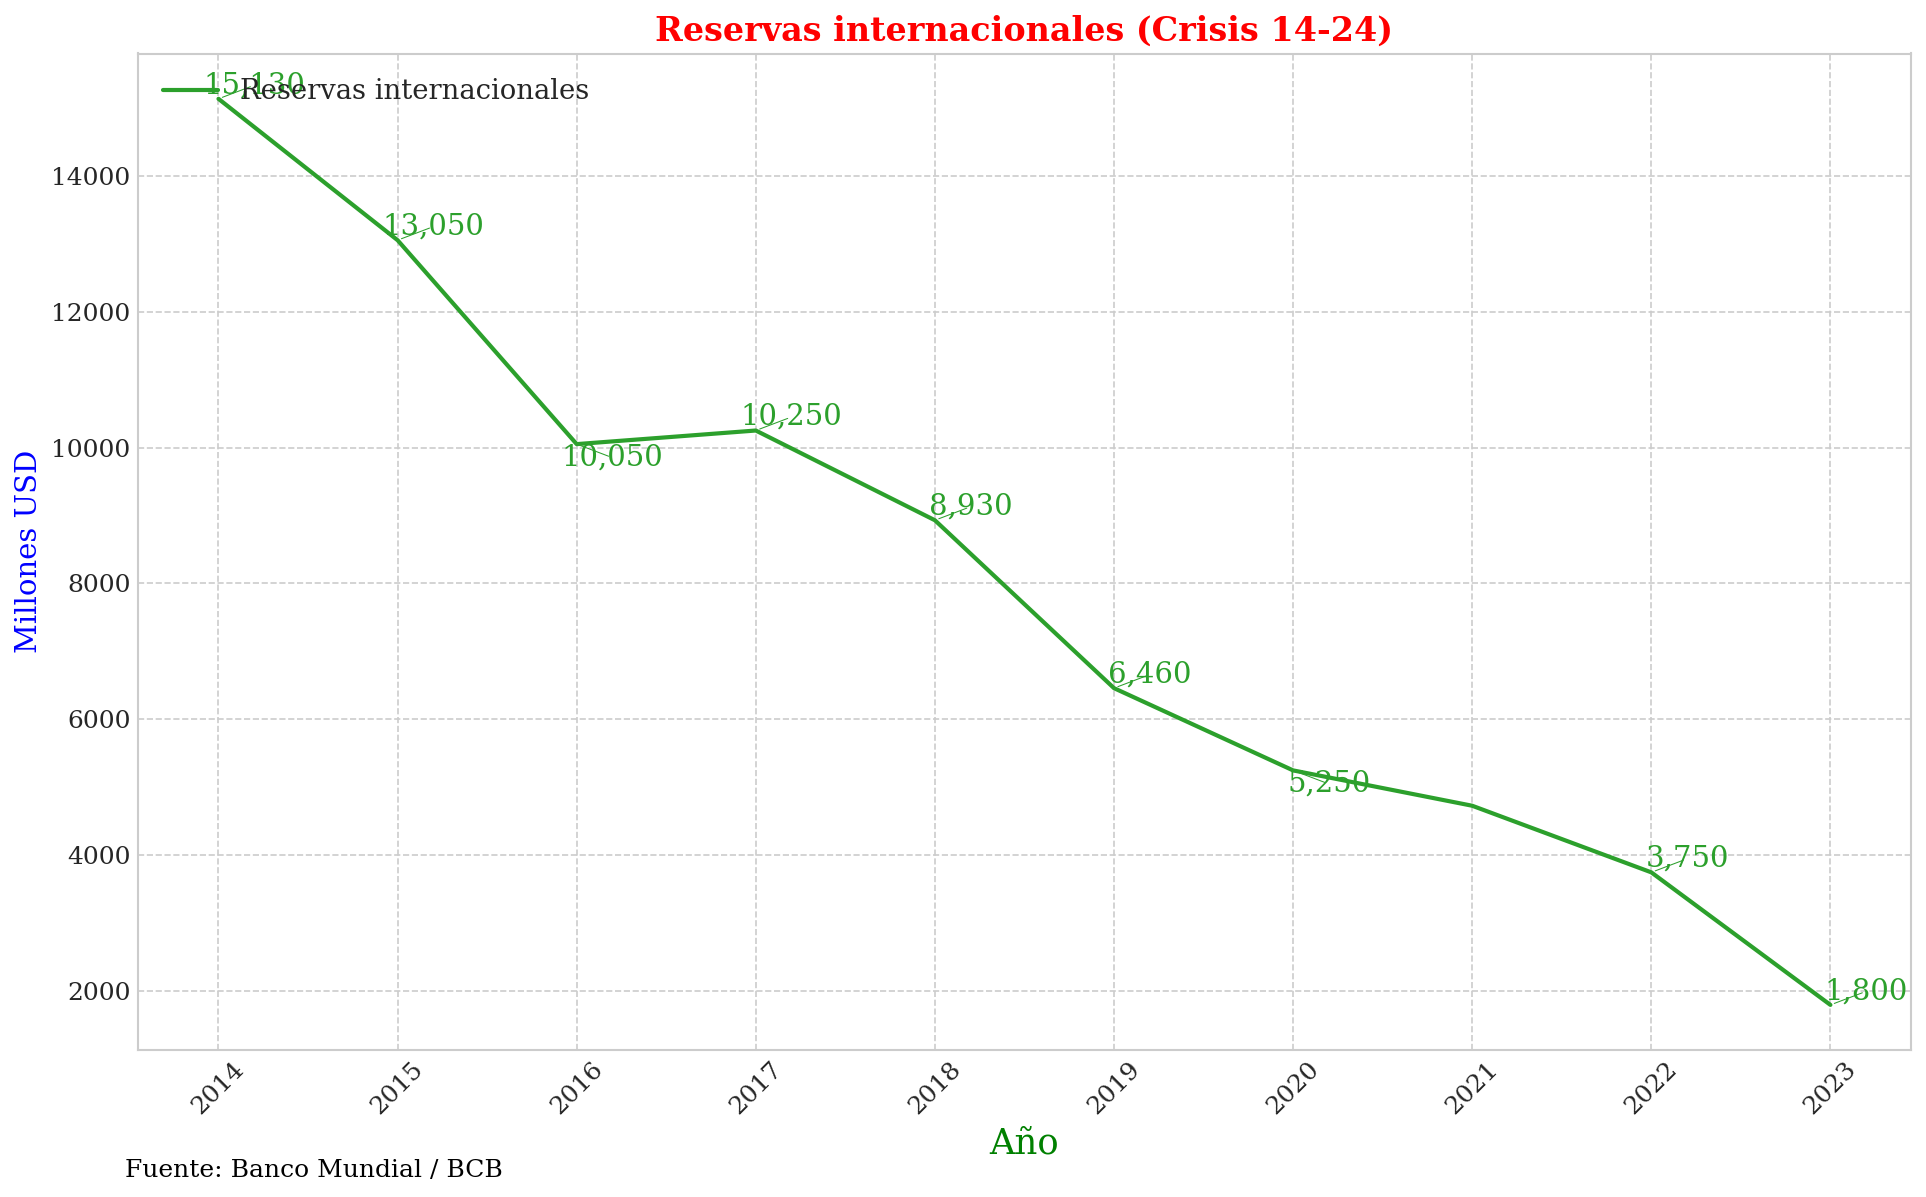

In [1]:
# ─────────────────────────────────────────────────────────────────────
# Importaciones
# ─────────────────────────────────────────────────────────────────────
import sys, os
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt

# Si aún no instalaste el paquete en editable, descomenta la siguiente línea:
# sys.path.append(os.path.abspath('../'))

from func_auxiliares.graficos_utils import (
    get_df, set_style, init_base_plot, add_year_value_annotations, compute_annot_years
)
from func_auxiliares.config import (
    DB_PATH, ASSETS_DIR,
    PERIODOS_PARA_CRISIS
)

# ─────────────────────────────────────────────────────────────────────
# Configuración general
# ─────────────────────────────────────────────────────────────────────
output_dir = ASSETS_DIR / "crisis" / "reservas_internacionales"
output_dir.mkdir(parents=True, exist_ok=True)

set_style()

# ─────────────────────────────────────────────────────────────────────
# Carga de datos
# ─────────────────────────────────────────────────────────────────────
SQL = """
    SELECT
      año,
      reservas_totales
    FROM Reservas_oro_divisas
"""
df = get_df(SQL, str(DB_PATH), index_col="año")

# ─────────────────────────────────────────────────────────────────────
# Componentes y parámetros de graficado
# ─────────────────────────────────────────────────────────────────────
componentes = [("reservas_totales", "Reservas internacionales")]
cols_componentes = [col for col, _ in componentes]
colors = {"reservas_totales": "#2ca02c"}


annotation_offsets = {
    "reservas_totales": {
        1950: (0,  2),
        1951: (0,  2),
        1952: (0,  2),
        1953: (0,  2),
        1954: (0,  2),
        1955: (0,  2),
        1956: (0,  2),
        1957: (0,  2),
        1958: (0, -3),  
        1959: (0,  2),
        1960: (0,  2),


        1980: (0.2,  10),   
        1981: (0.2,  10),
        1982: (0.2,  10),
        1983: (0.2,  10),
        1984: (0.2,  10),
        1985: (0.2,  10),
        1986: (0.2,  10),
        1987: (0.2, -15),   
        1988: (0.2,  10),
        1989: (0.2,  10),
        1990: (0.2,  10),

        2014: (0.2,  200),  
        2015: (0.2,  200),   
        2016: (0.2, -200),   
        2017: (0.2,  200),
        2018: (0.2,  200),
        2019: (0.2,  200),
        2020: (0.2, -200),   
        2022: (0.2,  200),
        2023: (0.2,  200),   
    }
}

# ─────────────────────────────────────────────────────────────────────
# Generación de gráficas por subperíodo
# ─────────────────────────────────────────────────────────────────────
for nombre, (ini, fin) in PERIODOS_PARA_CRISIS.items():
    sub = df.loc[ini:fin]

    years_to_annot = list(sub.index)
    fig, ax = init_base_plot(
        sub,
        series=componentes,
        colors=colors,
        title=f"Reservas internacionales ({nombre})",
        xlabel="Año",
        ylabel="Millones USD",
        source_text="Fuente: Banco Mundial / BCB"
    )
    add_year_value_annotations(
        ax,
        sub,
        years_to_annot,              # los años que quieres anotar
        cols_componentes,
        annotation_offsets,
        colors,
        arrow_lw=0.5,
    )
    fig.savefig(output_dir / f"reservas_{nombre}.png")
    plt.show()  # Mostrar la figura en pantalla
    plt.close(fig)